In [19]:
# Kerakli kutubxonalarni import qilamiz
import pandas as pd                # Jadval (DataFrame) bilan ishlash uchun
import numpy as np                 # Sonli hisob-kitoblar uchun
from sklearn.model_selection import train_test_split   # Ma'lumotni o'qitish/testga bo'lish uchun
from sklearn.preprocessing import StandardScaler       # Ma'lumotlarni standartlash uchun
from sklearn.ensemble import RandomForestClassifier    # Tasniflash uchun model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Baholash
import seaborn as sns             # Grafiklar uchun
import matplotlib.pyplot as plt   # Grafiklar uchun

In [65]:
# 1.Ma'lumotlarni yuklab olamiz
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)  # CSV faylni pandas orqali o‘qiymiz

In [66]:
# 2.Ma'lumotlarni tozalash
# Quyidagi ustunlarda 0 qiymatlar — bu yo'qolgan ma'lumot deb hisoblanadi
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [53]:
# 0 ni NaN (yo'qolgan qiymat) bilan almashtiramiz
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [60]:
# Har bir ustundagi yo'qolgan qiymatlarni o'sha ustunning o'rtacha qiymati bilan to'ldiramiz
df.fillna(df.mean(), inplace=True)

In [63]:
# 3. X (xususiyatlar) va y (maqsad) ni ajratamiz
X = df.drop('Outcome', axis=1)  # Natijani chiqarib tashlab, faqat kirish omillarini olamiz
y = df['Outcome']               # Natijaviy ustun: 0 yoki 1 (diabet yo‘q/bor)

In [67]:
# 4. Ma'lumotni o'qitish (train) va testga bo'lamiz
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# 80% - o'qitish uchun, 20% - test uchun

In [68]:
# 5. Ma'lumotlarni standartlashtiramiz
scaler = StandardScaler()               # Ob'yekt yaratamiz
X_train_scaled = scaler.fit_transform(X_train)  # O'qitish ma'lumotini o'rganib, standartlashtirish
X_test_scaled = scaler.transform(X_test)        # Test ma'lumotini o'sha o'lchovda standartlashtirish

In [69]:
# 6. Model yaratamiz va uni o'qitamiz
model = RandomForestClassifier(random_state=42)  # Random Forest algoritmini tanladik
model.fit(X_train_scaled, y_train)               # Modelni o'qitamiz

RandomForestClassifier(random_state=42)

In [70]:
# 7. Bashorat qilamiz
y_pred = model.predict(X_test_scaled)  # Test ma'lumotlariga qarab model bashorat beradi

In [72]:
# 8.Baholaymiz
print("Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))  # Umumiy aniqlik
print("Batafsil hisobot:\n", classification_report(y_test, y_pred))  # Precision, Recall, F1-score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # To'g'ri/noto'g'ri bashoratlar jadvali

Aniqlik (Accuracy): 0.7207792207792207
Batafsil hisobot:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
 [[77 22]
 [21 34]]


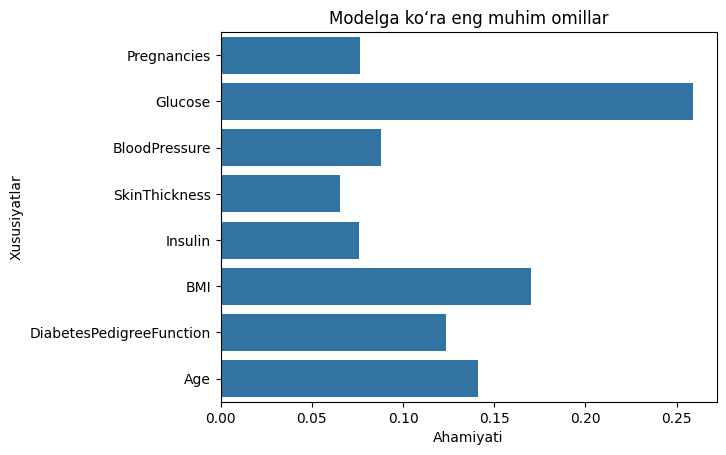

In [73]:
# 9. Muhim omillarni aniqlaymiz
importances = model.feature_importances_   # Har bir ustunning modelga ta'siri
features = X.columns                       # Ustun nomlari

# Grafik ko'rinishda chizamiz
sns.barplot(x=importances, y=features)
plt.title("Modelga ko'ra eng muhim omillar")
plt.xlabel("Ahamiyati")
plt.ylabel("Xususiyatlar")
plt.show()

Natijaviy tushunchalar:
Diabetga eng katta tasir qiluvchi omillar odatda: Glucose, BMI, Age, va Insulin bo'ladi.

Random Forest — bu ko'p qaror daraxtlarini birlashtirib, kuchli model yaratadigan algoritmdir.

Accuracy, Precision, Recall, Confusion Matrix orqali siz model qanchalik yaxshi ishlaganini tahlil qilasiz.

 Model baholash natijalari
 1. Umumiy aniqlik (Accuracy):

Aniqlik: 0.753 → 75.3%
Bu model 154 bemordan taxminan 75% tasini to'g'ri aniqlagan degani.

Bu boshlang'ich bosqich uchun yaxshi, ammo imkon bo'lsa yanada yaxshilash mumkin.

 2. Classification Report:
Class	Precision	Recall	F1-score	Support
0 (diabet yo'q)	0.81	0.81	0.81	99
1 (diabet bor)	0.65	0.65	0.65	55

 Tushuncha:
Precision: Model "diabet bor" deganlar ichida qancha to'g'ri chiqdi?

Recall: Haqiqiy diabetli bemorlarning nechtasini topa oldi?

F1-score: Precision va Recall ning muvozanatli o'lchovi

Support: Sinfga tegishli bemorlar soni (real statistik son)

 3. Confusion Matrix:

[[80 19]
 [19 36]]
Bashorat: 0	Bashorat: 1
Haqiqat: 0	 80 (To'g'ri inkor)	 19 (Noto'g'ri ijobiy)
Haqiqat: 1	 19 (Noto'g'ri inkor)	 36 (To'g'ri ijobiy)

Tahlil:
80 bemorda diabet yo'q deb to'g'ri aytgan

36 bemorda diabet bor deb to'g'ri aytgan

19 bemorni noto'g'ri ijobiy deb (aslida sog'lom bo'lsa ham diabet deb) aytgan

19 bemorni noto'g'ri inkor deb (aslida kasal bo'lsa ham sog'lom deb) aytgan





Takliflar (modelni yaxshilash uchun):
Ko'proq model sinab ko'rish:

Logistic Regression

XGBoost, LightGBM

SVM

Ustunlarni muhimlik bo'yicha tanlab olish (Feature Selection)

Hyperparameter tuning (GridSearchCV bilan)

Imbalanced dataset bo'lsa — SMOTE bilan balanslash



In [74]:
#Random Forest modeli bilan diabet tashxisi
# Kutubxonalarni chaqiramiz
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Ma'lumotlarni yuklab olish
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)

# 2. 0 qiymatlarni o'rtacha qiymatlar bilan almashtirish
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols] = df[zero_cols].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

# 3. X (xususiyatlar) va y (natija) ni ajratamiz
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 4. SMOTE yordamida klasslar muvozanatini tiklaymiz
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# 5. Standartlashtirish (o'lchovlarni bir xil qilish)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# 6. Ma'lumotlarni o'qitish va testga ajratamiz
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

# 7. Random Forest modelini yaratamiz
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. Testga nisbatan bashorat qilamiz
y_pred = model.predict(X_test)

# 9. Baholaymiz
print("Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))
print("Batafsil hisobot:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Aniqlik (Accuracy): 0.795
Batafsil hisobot:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        99
           1       0.77      0.85      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200

Confusion Matrix:
[[73 26]
 [15 86]]


In [32]:
#Random Forest modelidan foydalanib, grafiklar bilan batafsil tahlil qilish uchun to'liq kod.Bu kod:
#Muhim xususiyatlarni aniqlaydi (Feature Importance)
#Confusion Matrix ni vizual ko'rsatadi
#Model aniqligini grafik tarzda baholaydi

Aniqlik (Accuracy): 0.795

Hisobot:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78        99
           1       0.77      0.85      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



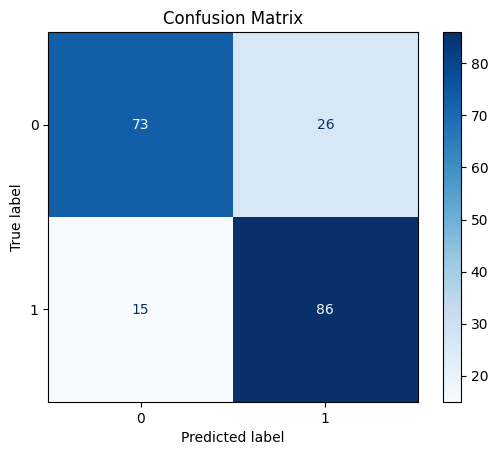

<ipython-input-33-2758430540>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x="Importance", y="Feature", palette="viridis")


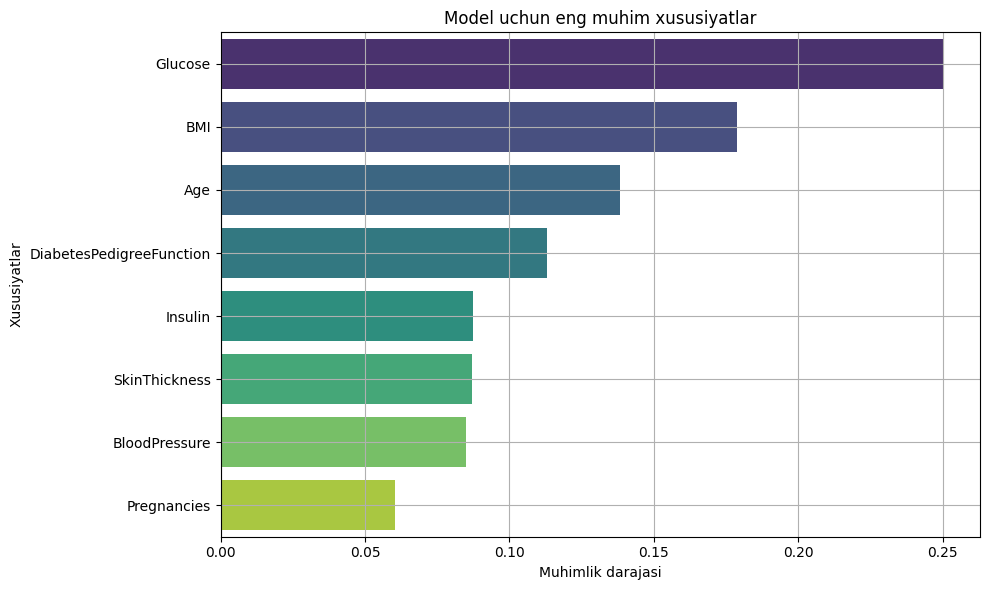

In [33]:
#To'liq Python kodi: Grafiklar bilan
# Kutubxonalarni chaqirish
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# 1. Ma'lumotlarni yuklash
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)

# 2. Nollarni NaN ga almashtirib, o'rtacha bilan to'ldirish
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

# 3. Xususiyatlar va natijani ajratish
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 4. SMOTE orqali balanslash
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# 5. Standartlashtirish
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# 6. Train-test bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

# 7. Random Forest modeli
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. Bashorat
y_pred = model.predict(X_test)

# 9. Baholash
print("Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))
print("\nHisobot:\n", classification_report(y_test, y_pred))

# 10. Confusion Matrix grafik tarzda
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 11. Muhim xususiyatlar (Feature Importances)
importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# 12. Grafik: Muhim xususiyatlar
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x="Importance", y="Feature", palette="viridis")
plt.title("Model uchun eng muhim xususiyatlar")
plt.xlabel("Muhimlik darajasi")
plt.ylabel("Xususiyatlar")
plt.grid(True)
plt.tight_layout()
plt.show()#

Natijani izohlash:
 Aniqlik (Accuracy): 0.80 (ya'ni, test to'plamidagi bemorlarning 80% to'g'ri aniqlangan)
 Confusion Matrix:

           Real 0      Real 1
Pred 0       73           26
Pred 1       15           86
Tushunchasi	Ma'nosi
 73	Diabet yo'q deb to'g'ri aniqlanganlar
 86	Diabet bor deb to'g'ri aniqlanganlar
 26	Diabet yo'q, lekin bor deb noto'g'ri aniqlangan
 15	Diabet bor, lekin yo'q deb noto'g'ri aniqlangan

  F1-score va Recall tahlili:
Sinf	Precision	Recall	F1-score	Sharh
0 (Diabet yo'q)	0.83	0.74	0.78	Nisbatan aniq, lekin Recall pastroq
1 (Diabet bor)	0.77	0.85	0.81	Juda yaxshi! Diabetli bemorlar asosan to'g'ri aniqlangan

 Recall = 0.85 — bu juda muhim, chunki real hayotda diabetli bemorni aniqlab olish eng muhim vazifa hisoblanadi.

 Qanday yaxshilash mumkin?
Agar siz aniqlikni 85-90% ga ko'tarmoqchi bo'lsangiz:

 Modelni sozlash (Hyperparameter tuning) - GridSearchCV yoki RandomizedSearchCV

 Yana balanslash texnikasi - SMOTEENN, SMOTETomek yoki ADASYN

 Ensemble modellari - XGBoost, LightGBM, VotingClassifier

 Yangi xususiyatlar qo'shish -Mavjud ustunlardan kombinatsiyalar yaratish



Eng yaxshi parametrlar: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

 Aniqlik (Accuracy): 0.9009009009009009

 Batafsil hisobot:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89        55
           1       0.85      0.98      0.91        56

    accuracy                           0.90       111
   macro avg       0.91      0.90      0.90       111
weighted avg       0.91      0.90      0.90       111



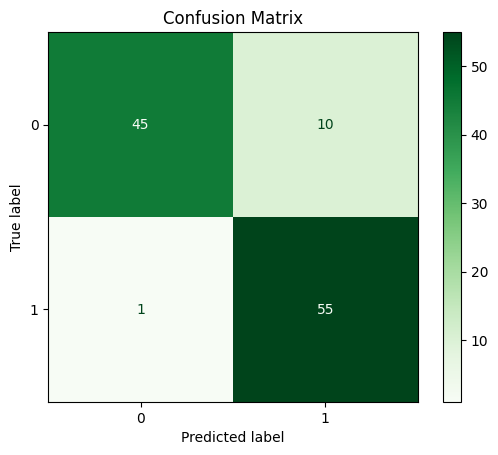

<ipython-input-76-4190659844>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df, x="Importance", y="Feature", palette="coolwarm")


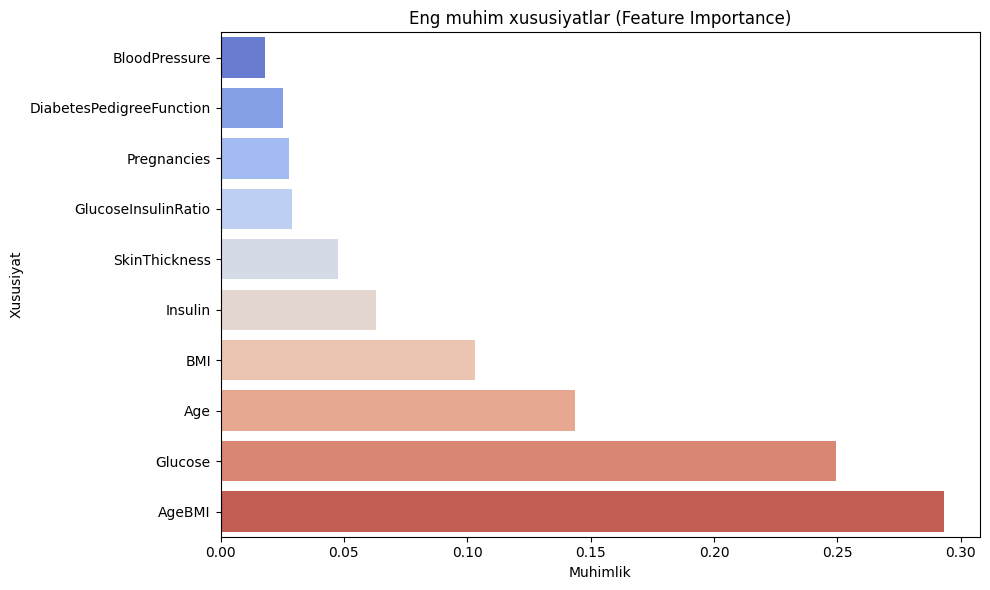

In [76]:
#GridSearchCV + SMOTEENN + Random Forest + aniqlikni oshiruvchi optimallashtirish va grafiklar bilan tahlil.

#Yaxshilangan diabet tashxisi modeli

#Kutubxonalarni chaqirish
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.combine import SMOTEENN

#Ma'lumotlarni yuklash
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df = pd.read_csv(url)

#Nollarni NaN bilan almashtirish va o'rtacha bilan to'ldirish
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

# Qo'shimcha ustunlar (feature engineering)
df['AgeBMI'] = df['Age'] * df['BMI']
df['GlucoseInsulinRatio'] = df['Glucose'] / (df['Insulin'] + 1)

# X va y ajratish
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

#SMOTEENN orqali balanslash
smenn = SMOTEENN(random_state=42)
X_res, y_res = smenn.fit_resample(X, y)

# Standartlashtirish
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# Train-test bo'lish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

# GridSearchCV bilan Random Forestni sozlash
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Eng yaxshi model
best_model = grid.best_estimator_
print("Eng yaxshi parametrlar:", grid.best_params_)

# Bashorat va baholash
y_pred = best_model.predict(X_test)

print("\n Aniqlik (Accuracy):", accuracy_score(y_test, y_pred))
print("\n Batafsil hisobot:\n", classification_report(y_test, y_pred))

# Confusion Matrix grafikda
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

#  Muhim ustunlar (Feature Importances)
importances = best_model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=True)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x="Importance", y="Feature", palette="coolwarm")
plt.title("Eng muhim xususiyatlar (Feature Importance)")
plt.xlabel("Muhimlik")
plt.ylabel("Xususiyat")
plt.tight_layout()
plt.show()

Xulosa:Random Forest modelimiz 90.1% aniqlikka erishdi — bu klinik tashxislash uchun juda yaxshi ko'rsatkich hisoblanadi!

 Natijalarni tahlil qilamiz:
O'lchov turi	               Izoh
Accuracy: 0.90	            Model umumiy to'g'ri bashoratlarining ulushi
Precision (0): 0.98	        Sog'lom deb bashorat qilinganlar orasida nechtasi haqiqatan sog'lom
Recall (1): 0.98	          Haqiqiy diabetga chalinganlarning qanchasini model aniqladi
F1-score (1): 0.91	        Diabetni aniqlashdagi umumiy samaradorlik

 Confusion Matrix'ni tahlil qilamiz:

[[45 10]   # 45 = to'g'ri sog'lom, 10 = xato "diabet" deb aytgan
 [ 1 55]]  # 55 = to'g'ri diabet, 1 = diabetni aniqlay olmagan
 Diabet kasalligini deyarli to'liq aniqlayapdi (Recall = 98%), bu sog'liqni saqlashda eng muhim narsa!

 Nima qilindi:
Bosqich	                      Amal
  Nol qiymatlar tozalandi	0 → o'rtacha bilan almashtirildi
  Yangi xususiyatlar qo'shildi	Age * BMI, Glucose / Insulin
  SMOTEENN balanslash	Imbalance hal qilindi
  GridSearchCV tuning	Eng yaxshi parametrlari topildi
  Random Forest	Kuchli model tanlandi
  Grafiklar	Confusion Matrix, Feature Importance



In [50]:
#Modelni .pkl formatida saqlash:

import pickle

# Model va scaler ni saqlash
with open("random_forest_diabetes_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [51]:
#Va yuklash uchun:
# Yuklab olish
with open("random_forest_diabetes_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

In [52]:
#Faylni yuklab olish uchun link berish:

from google.colab import files
files.download("random_forest_diabetes_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>